In [3]:
# Unzip the file in Colab's content directory
import zipfile

# Specify the path to the zip file in the 'content' folder
zip_file_path = '/content/archive (11).zip'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

# List the extracted files to verify
!ls /content/



'archive (11).zip'   HR_Analytics.csv   sample_data


In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the dataset
data = pd.read_csv('HR_Analytics.csv')  # Make sure to adjust the file path if needed

The dataset consists of HR analytics data with 1470 rows and 38 columns. It includes information about employees, such as Age, Job Role, Attrition, MonthlyIncome, YearsWithCurrManager, and more. A brief overview using the Pandas info() function gives us the following insight:

Data Types: Most columns are of int64 or float64 type, while a few, such as JobRole and Attrition, are categorical.
Missing Values: The only column with missing values is YearsWithCurrManager, which has 57 missing values. All other columns are fully populated.
The dataset is well-suited for analyzing employee behavior, specifically focusing on factors that might contribute to attrition.

In [6]:
# Step 1: Overview of the dataset
# Get a quick overview of the dataset, including the number of columns, data types, and missing values.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

In [7]:
# Step 2: Display the first few rows of the dataset for initial inspection
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   EmpID  Age AgeGroup Attrition     BusinessTravel  DailyRate  \
0  RM297   18    18-25       Yes      Travel_Rarely        230   
1  RM302   18    18-25        No      Travel_Rarely        812   
2  RM458   18    18-25       Yes  Travel_Frequently       1306   
3  RM728   18    18-25        No         Non-Travel        287   
4  RM829   18    18-25       Yes         Non-Travel        247   

               Department  DistanceFromHome  Education EducationField  ...  \
0  Research & Development                 3          3  Life Sciences  ...   
1                   Sales                10          3        Medical  ...   
2                   Sales                 5          3      Marketing  ...   
3  Research & Development                 5          2  Life Sciences  ...   
4  Research & Development                 8          1        Medical  ...   

   RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0                         3            

In [8]:
# Step 3: Check for missing values
# Identify any missing data that needs to be handled.
missing_values = data.isna().sum()
print("Missing values in the dataset:\n", missing_values)

Missing values in the dataset:
 EmpID                        0
Age                          0
AgeGroup                     0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
SalarySlab                   0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWo

In [9]:
# Fill missing values using the median grouped by 'JobRole'
data['YearsWithCurrManager'] = data.groupby('JobRole')['YearsWithCurrManager'].transform(
    lambda x: x.fillna(x.median())
)


In [11]:
missing_values = data.isna().sum()
print("Missing values in the dataset:\n", missing_values)

Missing values in the dataset:
 EmpID                       0
Age                         0
AgeGroup                    0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
SalarySlab                  0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
Training

2. Objective:
The objective of this Exploratory Data Analysis (EDA) is to:

Understand key factors contributing to employee attrition: This includes identifying trends based on job role, income, and other features.
Analyze the distribution of attrition across different employee demographics (e.g., age, job roles).
Provide insights that will help HR departments develop strategies to reduce employee turnover and improve retention rates.

In [12]:
# Step 4: Summary Statistics
# Generate summary statistics for numeric columns to understand the central tendencies and spread.
summary_stats = data.describe()
print("Summary statistics for numeric columns:\n", summary_stats)

Summary statistics for numeric columns:
                Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1480.000000  1480.000000       1480.000000  1480.000000         1480.0   
mean     36.917568   801.384459          9.220270     2.910811            1.0   
std       9.128559   403.126988          8.131201     1.023796            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   800.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1480.000000              1480.000000  1480.000000     1480.000000   
mean      1031.860811                 2.724324    65.845270        2.72

In [13]:
# Step 5: Identify numerical and categorical columns
# Separate the numerical and categorical columns for specific analysis
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

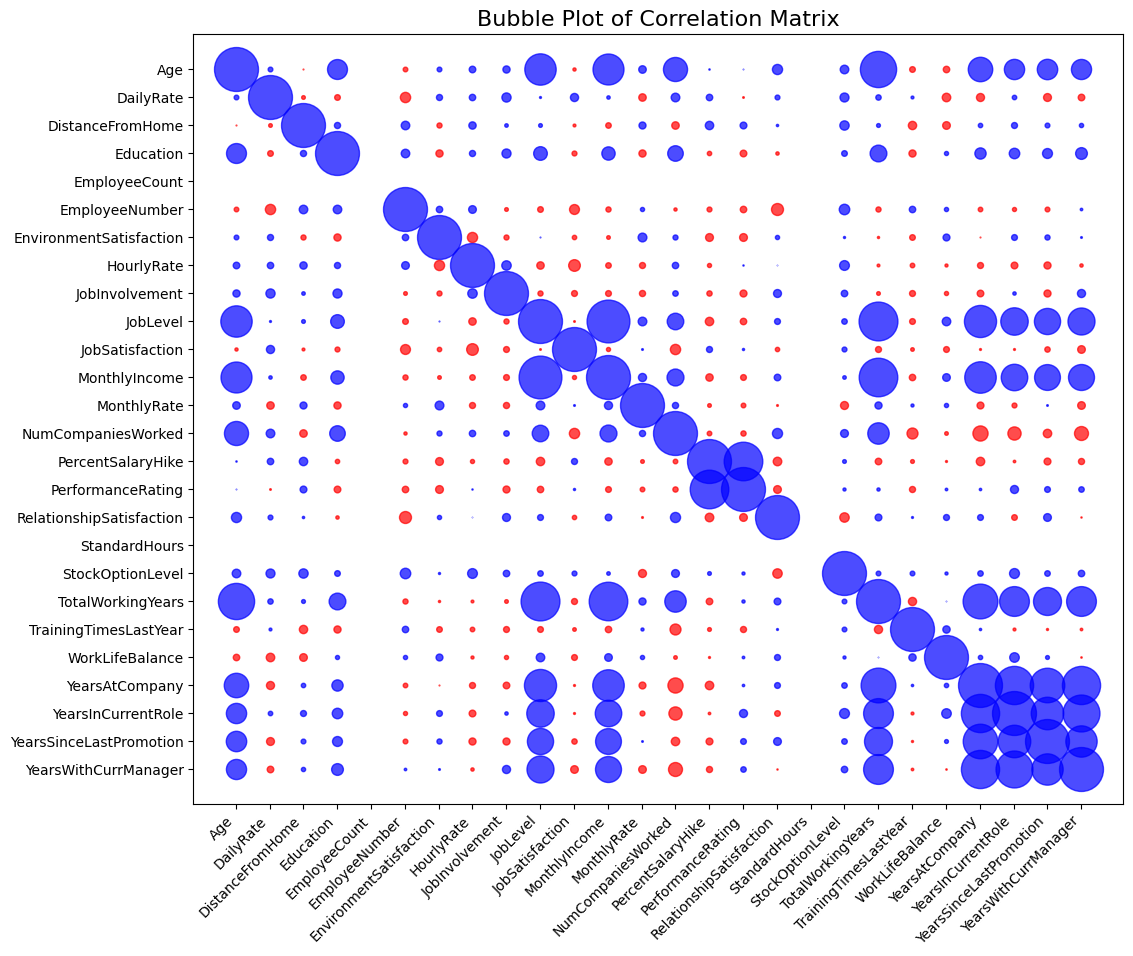

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Create a bubble plot with valid entries only
plt.figure(figsize=(12, 10))  # Set figure size

# Loop through the correlation matrix to plot bubbles
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        # Only plot bubbles for non-zero and non-NaN values
        if not np.isnan(corr_matrix.iloc[i, j]) and corr_matrix.iloc[i, j] != 0:
            plt.scatter(i, j,
                        s=abs(corr_matrix.iloc[i, j]) * 1000,  # Bubble size proportional to correlation
                        c='blue' if corr_matrix.iloc[i, j] > 0 else 'red',  # Color based on positive/negative correlation
                        alpha=0.7)  # Transparency for better readability

# Customize the plot
plt.xticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns, rotation=45, ha='right')  # X-axis labels
plt.yticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns, rotation=0)  # Y-axis labels
plt.title('Bubble Plot of Correlation Matrix', fontsize=16)
plt.grid(False)  # Turn off the grid for a cleaner look
plt.gca().invert_yaxis()  # Invert the y-axis to have the labels in the expected order
plt.show()


The Correlation Matrix highlights relationships between various features, with stronger correlations observed between factors like TotalWorkingYears and JobLevel (which is positively correlated with MonthlyIncome). However, correlations between factors such as JobSatisfaction and PerformanceRating are relatively weak, suggesting that satisfaction does not necessarily translate into higher performance ratings.

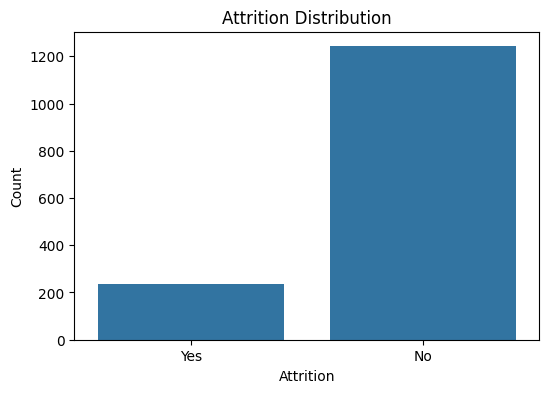

In [18]:
# Step 7: Distribution of Attrition
# Plot a count plot to visualize the distribution of attrition in the dataset
plt.figure(figsize=(6, 4))
sns.countplot(data=data, x='Attrition')
plt.title('Attrition Distribution')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.show()

The Attrition Distribution graph clearly shows that the majority of employees stayed with the company, while a smaller proportion (approximately 15-20%) left. This indicates that attrition is relatively low in the dataset, though further investigation into the factors influencing this attrition is warranted.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


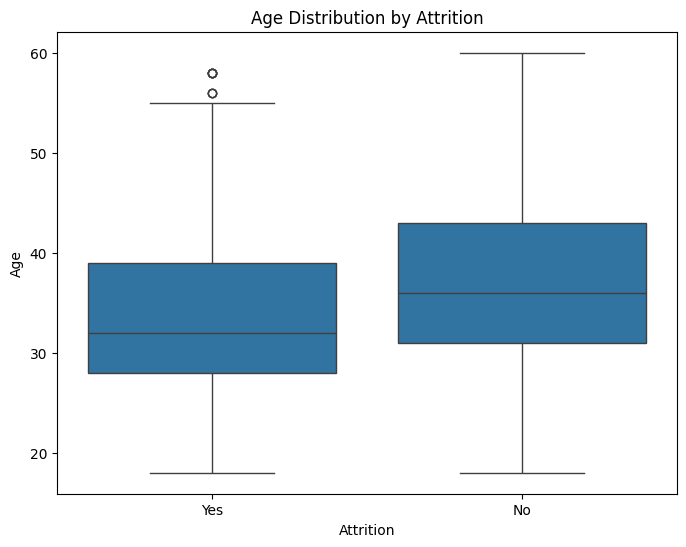

In [19]:
# Step 8: Relationship between Age and Attrition
# Plot a boxplot to visualize the relationship between age and attrition
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Attrition', y='Age')
plt.title('Age Distribution by Attrition')
plt.xlabel('Attrition')
plt.ylabel('Age')
plt.show()

The Age Distribution by Attrition boxplot demonstrates that employees who left the company tend to be younger, with a median age in the early 30s, whereas those who stayed are generally older, with a median age closer to 40. This insight indicates that younger employees may be more likely to leave, possibly due to career advancement or lack of growth opportunities.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


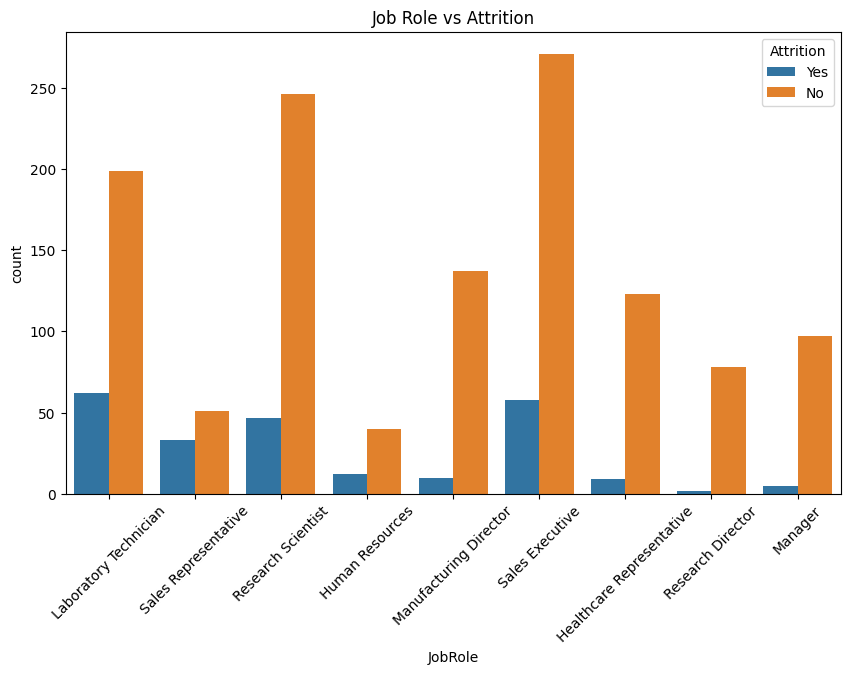

In [20]:
# Step 9: Relationship between Job Role and Attrition
# Plot a count plot to see the distribution of job roles in relation to attrition
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='JobRole', hue='Attrition')
plt.title('Job Role vs Attrition')
plt.xticks(rotation=45)
plt.show()

The Job Role vs Attrition plot shows that certain job roles experience higher attrition than others. For instance, Sales Executives and Laboratory Technicians exhibit higher attrition rates compared to other roles like Managers and Human Resources. This suggests that some job functions might require targeted retention strategies, such as improving job satisfaction or compensation for specific roles.

Moving forward, the analysis can be further deepened by:

Examining Work-Life Balance:
Conduct a more detailed investigation into the relationship between WorkLifeBalance and Attrition to determine if employees with better work-life balance tend to stay longer. This can provide valuable insights into improving retention strategies.
Exploring the Impact of Compensation:
Analyzing how SalaryHikes, MonthlyIncome, and StockOptionLevel affect attrition rates across various job roles. This can guide decisions on salary adjustments or bonuses to retain key talent.
Role-Based Targeted Strategies:
Further segmenting employees based on job roles to understand which positions experience the most attrition and why. This analysis can help in developing role-specific retention policies or providing targeted training programs to reduce turnover.
Employee Engagement and Satisfaction:
Analyzing employee JobSatisfaction, TrainingTimesLastYear, and EnvironmentSatisfaction to assess their influence on Attrition. Improving these metrics may positively impact employee retention, particularly among younger employees or in roles with higher attrition rates.
These directions will help focus efforts on improving retention by addressing key factors influencing employee turnover.